In [7]:
from cmd import IDENTCHARS
from PIL import Image
import numpy as np
import os
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
class_names = ['Chen Qiyao', 'Zhang Zy','Ma Dh','Han Yl']
#print(imagePaths)

def loadImage(path):
    faceimg=[]
    idimg=[]
    imagePaths = [os.path.join(path, f) for f in os.listdir(path)] 
    print('reading data')
    for imagePath in imagePaths:
 # 读取图片
        PIL_img = Image.open(imagePath).convert('L')   # convert it to grayscale
        img = PIL_img.resize((128, 128),Image.ANTIALIAS)
        img_numpy = np.array(img, 'float')
        id = int(os.path.split(imagePath)[-1].split(".")[1])
        #print('ID:'+str(id)+'   size'+str(img.size)+'  raw'+str(PIL_img.size))
        faceimg.append(img_numpy/255.00)
        idimg.append(id)
    return np.array(faceimg),np.array(idimg)

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(128, 128,1)),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    #keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

facelist,idlist=loadImage('Facedata')
testface,testid=loadImage('Facedata_test')
print('data complete'+'len of id:'+str(len(idlist)))


reading data
reading data
data completelen of id:2400


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 53824)             0         
                                                                 
 dense_3 (Dense)             (None, 100)              

C:\Users\11139\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


75/75 [==============================] - 6s 69ms/step - loss: 0.2111 - accuracy: 0.9446
Epoch 2/7
75/75 [==============================] - 5s 68ms/step - loss: 0.0114 - accuracy: 0.9983
Epoch 3/7
75/75 [==============================] - 5s 68ms/step - loss: 0.0046 - accuracy: 0.9983
Epoch 4/7
75/75 [==============================] - 5s 67ms/step - loss: 0.0016 - accuracy: 0.9996
Epoch 5/7
75/75 [==============================] - 5s 68ms/step - loss: 8.3023e-05 - accuracy: 1.0000
Epoch 6/7
75/75 [==============================] - 5s 68ms/step - loss: 3.4308e-05 - accuracy: 1.0000
Epoch 7/7
75/75 [==============================] - 5s 71ms/step - loss: 2.4903e-05 - accuracy: 1.0000
dict_keys(['loss', 'accuracy'])


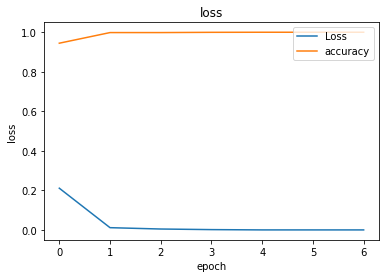

weight saved
2/2 - 1s - loss: 5.1790e-04 - accuracy: 1.0000 - 501ms/epoch - 250ms/step

Test accuracy: 1.0

Test loss 0.0005178975989110768


In [8]:
model.summary()

model.compile(
                optimizer='adam',
            #optimizer= tf.keras.optimizers.SGD(lr = 0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history=model.fit(facelist, idlist, epochs=7)
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'accuracy'], loc='upper right')
plt.show()

model.save_weights('./weigths.h5')
print('weight saved')
test_loss, test_acc = model.evaluate(testface,  testid, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss', test_loss)

In [3]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'yellow'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [9]:

predictions = model.predict(testface)
predictions
np.argmax(predictions[0])

0

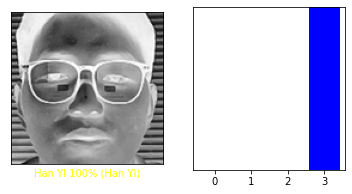

In [10]:
i = 25
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], testid,testface)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testid)
plt.show()

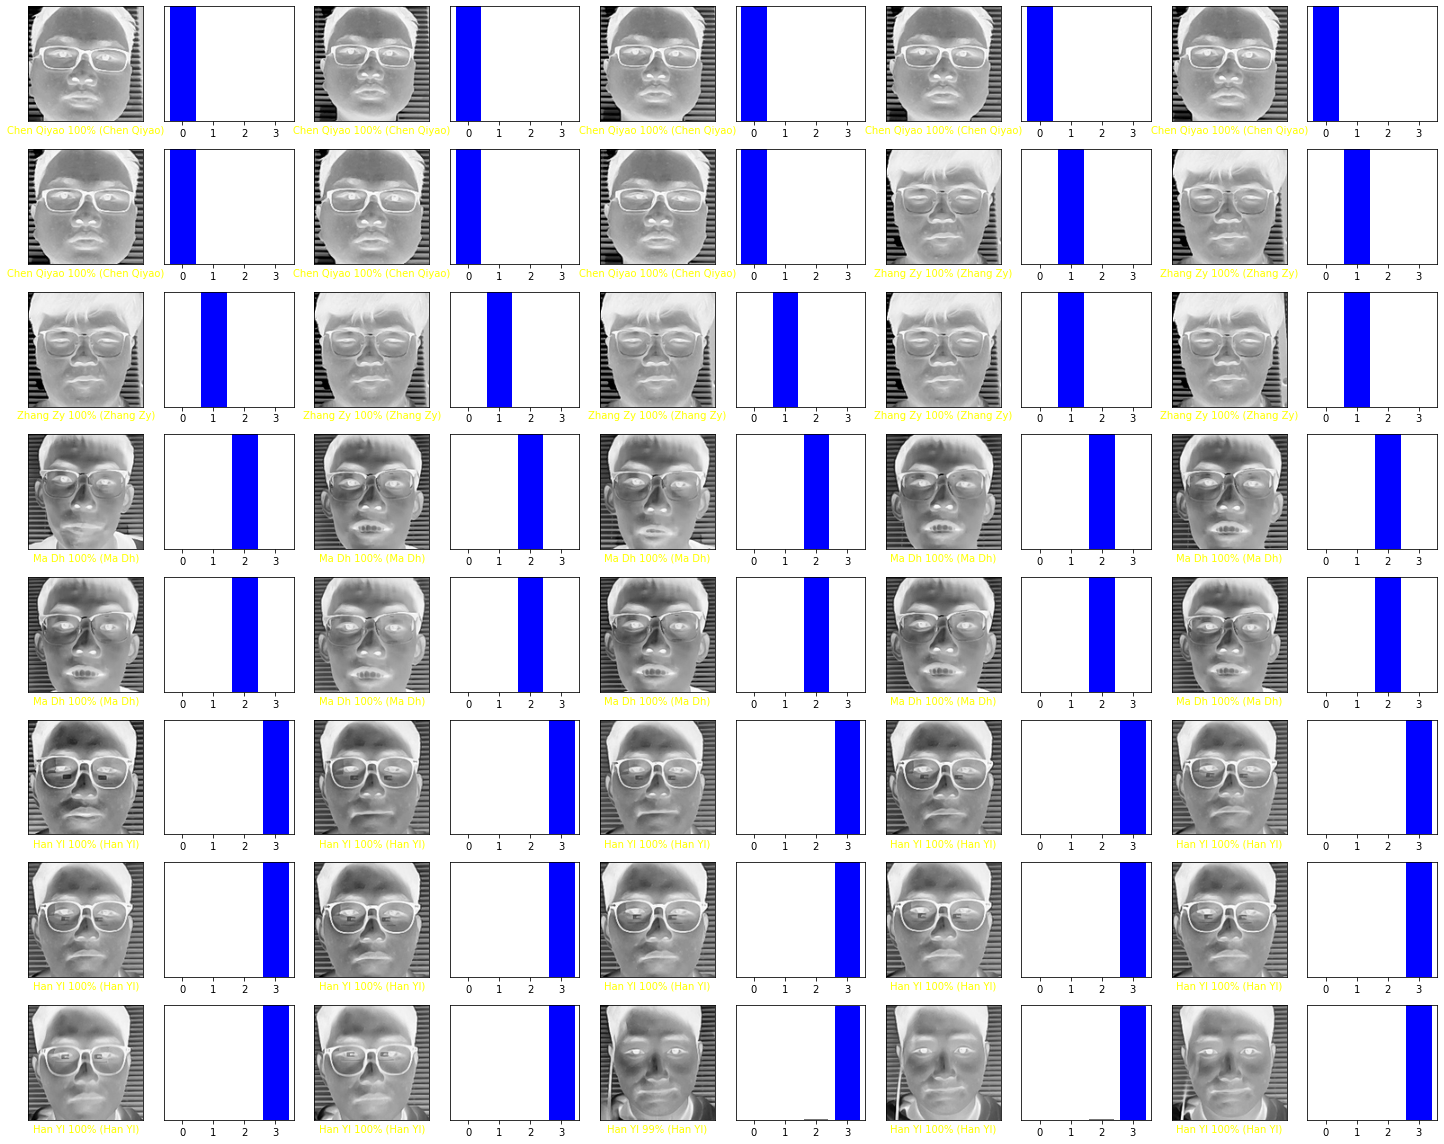

In [13]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], testid, testface)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], testid)
plt.tight_layout()
plt.show()